<a href="https://www.kaggle.com/code/tirendazacademy/image-classification-with-tensorflow?scriptVersionId=131886514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Human vs Horses Classification using CNN with TensorFlow </div></b>

![](https://img.freepik.com/free-vector/horse-riding-background-design-with-sport-equipment-symbols-flat-illustration_1284-64864.jpg?w=1380&t=st=1685628545~exp=1685629145~hmac=c92f8ba8b6324aeab5e0d009100d8fe6b3e8a85f173e3760e5ba989e9e2e9bab)

Hi guys 😀 This notebook walks you through how to implement CNN with TensorFlow. 

Table of contents:
<ul>
<li><a href="#importing">Importing required libraries </a></li>  
<li><a href="#understanding">Understanding the data </a></li>  
<li><a href="#preprocessing">Data Preprocessing</a></li>   
<li><a href="#building">Model Building</a></li>      
<li><a href="#training">Model Training</a></li>   
<li><a href="#prediction">Prediction</a></li> 
<li><a href="#conclusion">Conclusion</a></li>   
</ul>

Let's dive in!

<a id='importing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Importing Required Libraries </div></b>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as implt
import seaborn as sns
sns.set_style()

<a id='understanding'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Understanding the data</div></b>

In [2]:
train_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/train'
val_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation'

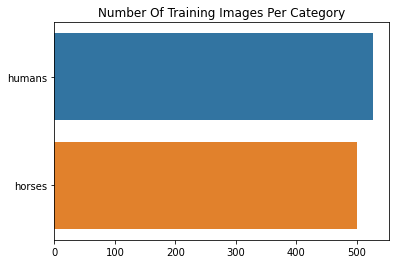

In [3]:
category_names = os.listdir(train_path) # output: ['humans', 'horses']
nb_categories = len(category_names) # output: 2
train_images = []

for category in category_names:
    folder = train_path + "/" + category
    train_images.append(len(os.listdir(folder)))

sns.barplot( x=train_images, y=category_names).set_title("Number Of Training Images Per Category");

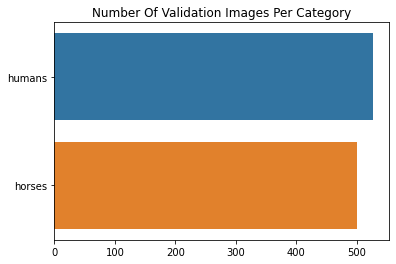

In [4]:
val_images = []
for category in category_names:
    folder = val_path + "/" + category
    val_images.append(len(os.listdir(folder)))

sns.barplot(x=train_images, y=category_names).set_title("Number Of Validation Images Per Category");

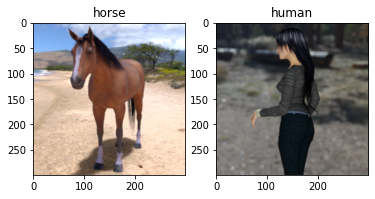

In [5]:
train_horses = "/kaggle/input/horses-or-humans-dataset/horse-or-human/train/horses"
train_humans = "/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans"

img1 = implt.imread(train_horses + "/horse02-0.png")
img2 = implt.imread(train_humans + "/human02-00.png")

plt.subplot(1, 2, 1)
plt.title('horse')
plt.imshow(img1)       
plt.subplot(1, 2, 2)
plt.title('human')
plt.imshow(img2)
plt.show()

<a id='preprocessing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Data Preprocessing </div></b>

ImageDataGenerator allows you to generate batches of tensor image data with real-time data augmentation.

In [6]:
# The Keras ImageDataGenerator with data augmentation for the training set
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# To generate images from a directory for the training process.
train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size=(300, 300),
  batch_size=32,
  class_mode='binary'
)

# The Keras ImageDataGenerator with data augmentation for the test set
validation_datagen = ImageDataGenerator(rescale=1/255)

# To generate images from a directory for the training process.
validation_generator = train_datagen.flow_from_directory(
  val_path,
  target_size=(300, 300),
  class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


<a id='building'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Model Building </div></b>

In [7]:
cnn_model = tf.keras.models.Sequential([
  layers.Conv2D(16, 3, activation='relu', input_shape=(300, 300, 3)),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(1, activation='sigmoid')
])

In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [9]:
cnn_model.compile(
    loss='binary_crossentropy',       
    optimizer=tf.keras.optimizers.Adam(),        
    metrics=['accuracy'])

<a id='training'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Model Training</div></b>


In [10]:
history = cnn_model.fit(
  train_generator,
  epochs=15,
  validation_data=validation_generator,
)

Epoch 1/15
33/33 [==============================] - 44s 1s/step - loss: 0.6871 - accuracy: 0.5579 - val_loss: 0.6450 - val_accuracy: 0.5547
Epoch 2/15
33/33 [==============================] - 32s 959ms/step - loss: 0.5095 - accuracy: 0.7361 - val_loss: 1.0951 - val_accuracy: 0.5234
Epoch 3/15
33/33 [==============================] - 32s 966ms/step - loss: 0.3311 - accuracy: 0.8500 - val_loss: 1.4530 - val_accuracy: 0.5547
Epoch 4/15
33/33 [==============================] - 32s 970ms/step - loss: 0.3239 - accuracy: 0.8627 - val_loss: 1.6073 - val_accuracy: 0.5625
Epoch 5/15
33/33 [==============================] - 32s 967ms/step - loss: 0.3241 - accuracy: 0.8549 - val_loss: 0.7821 - val_accuracy: 0.5312
Epoch 6/15
33/33 [==============================] - 32s 977ms/step - loss: 0.3079 - accuracy: 0.8734 - val_loss: 0.7786 - val_accuracy: 0.6523
Epoch 7/15
33/33 [==============================] - 32s 970ms/step - loss: 0.2096 - accuracy: 0.9085 - val_loss: 2.3334 - val_accuracy: 0.5781
Ep

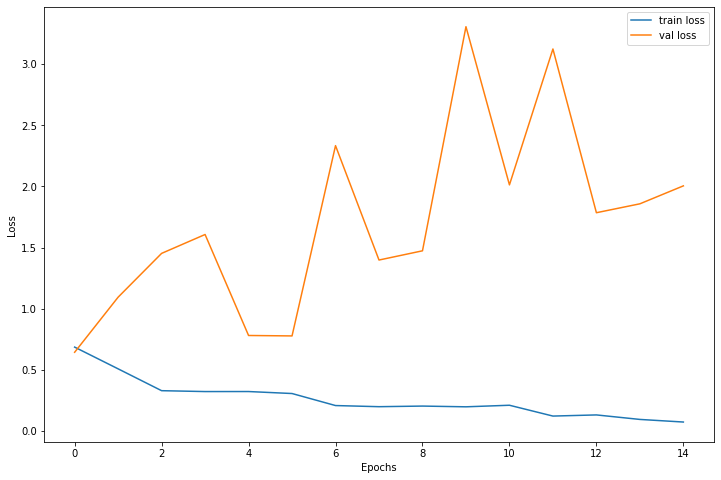

<Figure size 432x288 with 0 Axes>

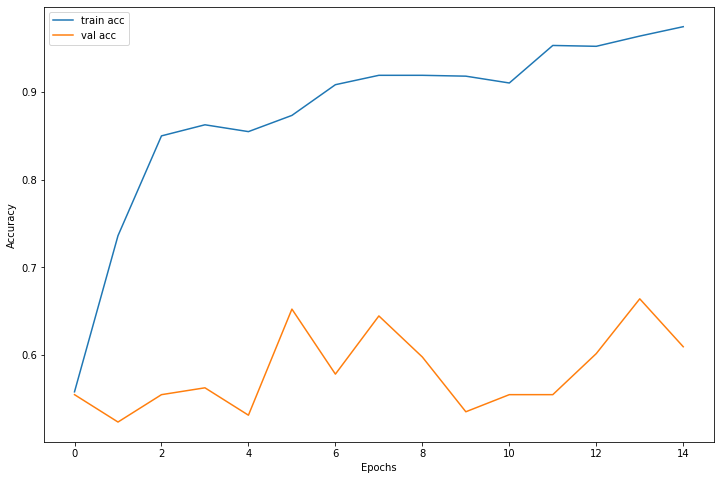

In [11]:
plt.figure(figsize = (12, 8))

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.savefig('Loss_val loss')

# Plotting the Training and Validation Accuracy
plt.figure(figsize = (12, 8))
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig('accVal_acc')

<a id='prediction'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Prediction</div></b>

In [12]:
# Creating a path variable:
path = f'{val_path}/humans/valhuman01-01.png'

# Loading the image and resizes
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

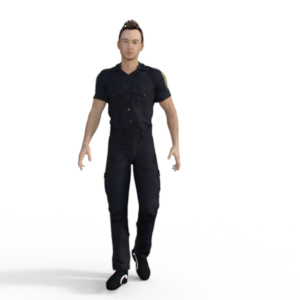

In [13]:
img

In [14]:
classes = cnn_model.predict(x)
if classes[0]>0.5:
    print(" Image is a human")
else:
    print(" Image is a horse")

 Image is a human


<a id='conclusion'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Conclusion</div></b>

In this notebook, we've seen how to build an CNN model for horse or human classification and how to predict an image with this model. Thanks for taking the time! If you enjoyed it, please consider upvoting.

🔗 Let's connect [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [Instagram](https://www.instagram.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎

## Resource
- [AI and Machine Learning for Coders](https://www.oreilly.com/library/view/ai-and-machine/9781492078180/)